# Mini Project - 2020AIML503

Starting with Exploratory data analysis

In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns #for data visualisation
import statsmodels.api as sm
%matplotlib inline
sns.set(color_codes=True)

In [43]:
bags_df = pd.read_csv('AIML_C5_May 2021_Data_miniproject.csv')
#To display top 5 rows
bags_df.head(10)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134
5,450.0,26.8,29.7,34.7,13.6024,U
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35,12.6700,4.69
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,#,30.7,36.2,14.2266,4.9594


In [44]:
#to display last 10 rows
bags_df.tail(10)

,Cost,Weight,Weight1,Length,Height,Width
149,9.8,10.7,11.2,12.4,2.0832,1.2772
150,8.7,10.8,11.3,12.6,1.9782,1.2852
151,10.0,11.3,11.8,13.1,2.2139,1.2838
152,9.9,11.3,11.8,13.1,2.2139,1.1659
153,9.8,11.4,12.0,13.2,2.2044,1.1484
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.269
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


In [45]:
#checking the data types
bags_df.dtypes

Cost       float64
Weight      object
Weight1    float64
Length      object
Height     float64
Width       object
dtype: object

In [46]:
bags_df.shape

(159, 6)

In [47]:
#nderstanding columns and datatypes
bags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [48]:
#Renaming the columns
bags_df = bags_df.rename(columns={"Weight":"Weight_compact", "Weight1":"Weight_expanded"})
bags_df.head()

,Cost,Weight_compact,Weight_expanded,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [49]:
'''In our dataset, all columns are relevant. 
   Hence not dropping any columns using .drop() command.
   Moving on to checking for duplicate rows. 
   A new dataset is prepared to host the duplicate rows to keep the original dataset intact'''

duplicate_bags_df = bags_df[bags_df.duplicated()]
print("Number of duplicate rows are: ", duplicate_bags_df.shape)

Number of duplicate rows are:  (0, 6)


In [50]:
#replacing the non-float values from columns with null value and converting the datatype to float
bags_df["Weight_compact"] = bags_df["Weight_compact"].replace(to_replace = "#", value=np.nan)
bags_df["Weight_compact"] = bags_df["Weight_compact"].replace(to_replace = "&", value=np.nan)
bags_df["Weight_compact"] = bags_df["Weight_compact"].astype(float)

bags_df["Length"] = bags_df["Length"].replace(to_replace = "$", value=np.nan)
bags_df["Length"] = bags_df["Length"].astype(float)

bags_df["Width"] = bags_df["Width"].replace(to_replace = "U", value=np.nan)
bags_df['Width'] = bags_df["Width"].astype(float)

bags_df.info() #to see the results of changes made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cost             159 non-null    float64
 1   Weight_compact   157 non-null    float64
 2   Weight_expanded  159 non-null    float64
 3   Length           158 non-null    float64
 4   Height           158 non-null    float64
 5   Width            157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [51]:
#checking if any columns have any unique values
print("Cost:")
print(*list(bags_df.Cost.unique()))
print("Weight_compact:")
print(*list(bags_df.Weight_compact.unique()))
print("Weight_expanded: ")
print(*list(bags_df.Weight_expanded.unique()))
print("Length:")
print(*list(bags_df.Length.unique()))
print("Height:")
print(*list(bags_df.Height.unique()))
print("Width")
print(*list(bags_df.Width.unique()))


Cost:
242.0 290.0 340.0 363.0 430.0 450.0 500.0 390.0 475.0 600.0 700.0 610.0 650.0 575.0 685.0 620.0 680.0 725.0 720.0 714.0 850.0 1000.0 920.0 955.0 925.0 975.0 950.0 40.0 69.0 78.0 87.0 120.0 0.0 110.0 150.0 145.0 160.0 140.0 169.0 161.0 200.0 180.0 272.0 270.0 306.0 540.0 800.0 55.0 60.0 90.0 170.0 273.0 300.0 5.9 32.0 51.5 70.0 100.0 80.0 85.0 115.0 125.0 130.0 135.0 225.0 188.0 197.0 218.0 260.0 265.0 250.0 320.0 514.0 556.0 840.0 690.0 900.0 820.0 1015.0 1100.0 345.0 456.0 510.0 567.0 770.0 1250.0 1600.0 1550.0 1650.0 6.7 7.5 7.0 9.7 9.8 8.7 10.0 9.9 12.2 13.4 19.7 19.9
Weight_compact:
23.2 24.0 23.9 26.3 26.5 26.8 27.6 nan 28.4 28.7 29.1 29.5 29.4 30.4 30.9 31.0 31.3 31.4 31.5 31.8 31.9 32.0 32.7 32.8 33.5 35.0 36.2 37.4 38.0 12.9 16.5 17.5 18.2 18.6 19.0 19.1 19.4 20.4 20.5 21.0 21.1 22.0 22.1 23.6 25.0 24.1 25.6 28.5 33.7 37.3 13.5 14.3 16.3 18.4 19.8 21.2 23.0 7.5 12.5 13.8 15.0 15.7 16.2 16.8 17.2 17.8 19.3 20.0 20.7 21.5 22.6 23.5 25.2 25.4 25.9 26.9 27.8 30.5 32.5 34.0 34

In [52]:
'''Looks like we do not have any unique characters to take care of.
   Starting with the next step. Lets check how the data is spread out using the describe() method'''
bags_df.describe()

,Cost,Weight_compact,Weight_expanded,Length,Height,Width
count,159.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,398.326415,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.978317,10.052942,10.716328,11.646141,4.273069,47884.860134
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.125000,5.940600,3.395700
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.589000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


Handling missing values

In [53]:
#check the null values in the dataset
bags_df.isnull().sum()

Cost               0
Weight_compact     2
Weight_expanded    0
Length             1
Height             1
Width              2
dtype: int64

Null values are not much in quantity, could drop them but in the interest of learning, I will replace them with median values.

In [54]:
median1 = bags_df["Weight_compact"].median()
median2 = bags_df["Length"].median()
median3 = bags_df["Height"].median()
median4 = bags_df["Width"].median()

bags_df["Weight_compact"].replace(np.nan,median1,inplace=True)
bags_df["Length"].replace(np.nan,median2,inplace=True)
bags_df["Height"].replace(np.nan,median3,inplace=True)
bags_df["Width"].replace(np.nan,median4,inplace=True)
bags_df.isnull().sum() #lets check again

Cost               0
Weight_compact     0
Weight_expanded    0
Length             0
Height             0
Width              0
dtype: int64

In [55]:
#checking if any value has changed drastically
bags_df.describe()

,Cost,Weight_compact,Weight_expanded,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.246541,28.415723,31.229560,8.925576,3777.977521
std,357.978317,9.989816,10.716328,11.609869,4.260588,47582.744610
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


looks like I have not done too much damage. Let's move on to the complicated bits.

Checking for outliers

<AxesSubplot:>

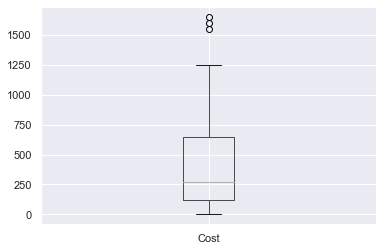

In [56]:
bags_df.boxplot(column='Cost')

we have some outliers in cost. Lets do the same for the rest of the columns.

<AxesSubplot:>

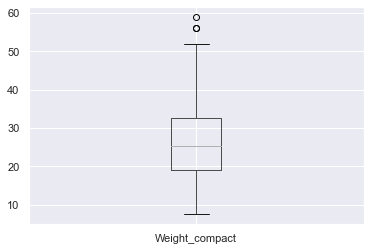

In [57]:
bags_df.boxplot(column='Weight_compact')

<AxesSubplot:>

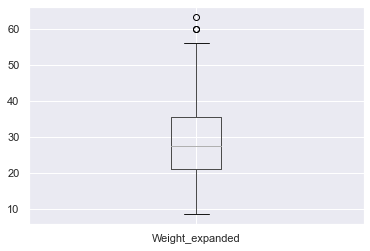

In [58]:
bags_df.boxplot(column='Weight_expanded')

<AxesSubplot:>

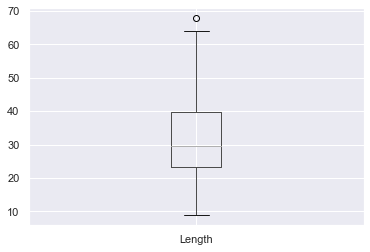

In [59]:
bags_df.boxplot(column="Length")

<AxesSubplot:>

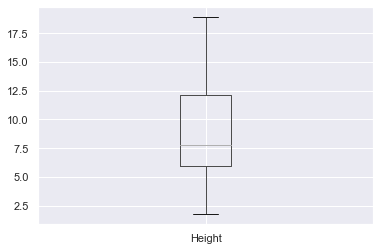

In [60]:
bags_df.boxplot(column='Height')

This column seems to be ok. No outliers here.

<AxesSubplot:>

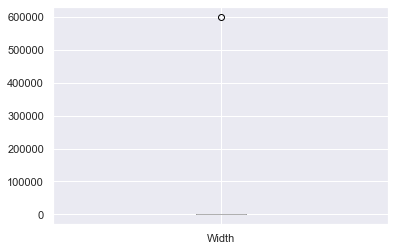

In [61]:
bags_df.boxplot(column='Width')

I will be removing outliers from all coulmns except 'Heght'. Here I will be using IQR score technique to remove the values beyong a defined threshold.

In [62]:
#creating a function to get the threshold values of minimum and maximum from IQR
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range, upper_range

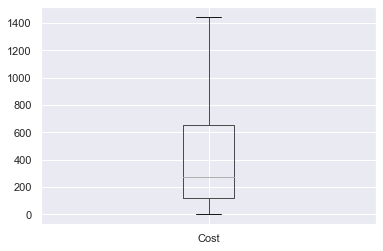

In [63]:
#taking column cost
lowercost, uppercost = remove_outlier(bags_df["Cost"])
bags_df["Cost"] = np.where(bags_df["Cost"]>uppercost,uppercost,bags_df["Cost"])
bags_df["Cost"] = np.where(bags_df["Cost"]<lowercost,lowercost,bags_df["Cost"])

bags_df.boxplot(column=["Cost"]) #visualising the column to see if it fixed the problem
plt.show()

Looks like it has done the trick. Let's do the same for all pending columns.

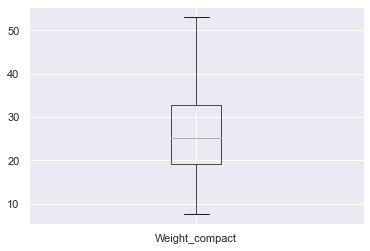

In [64]:
#taking column Weight_compact
lowerweightcomp, upperweightcomp = remove_outlier(bags_df["Weight_compact"])
bags_df["Weight_compact"] = np.where(bags_df["Weight_compact"]>upperweightcomp,upperweightcomp,bags_df["Weight_compact"])
bags_df["Weight_compact"] = np.where(bags_df["Cost"]<lowerweightcomp,lowerweightcomp,bags_df["Weight_compact"])

bags_df.boxplot(column=["Weight_compact"]) #visualising the column to see if it fixed the problem
plt.show()

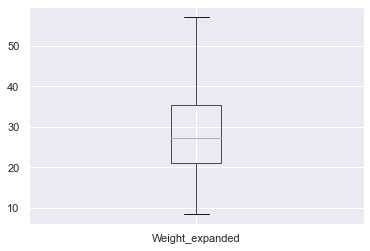

In [65]:
#taking column Weight_expanded
lowerweightexp, upperweightexp = remove_outlier(bags_df["Weight_expanded"])
bags_df["Weight_expanded"] = np.where(bags_df["Weight_expanded"]>upperweightexp,upperweightexp,bags_df["Weight_expanded"])
bags_df["Weight_expanded"] = np.where(bags_df["Weight_expanded"]<lowerweightexp,lowerweightexp,bags_df["Weight_expanded"])

bags_df.boxplot(column=["Weight_expanded"])#visualising the column to see if it fixed the problem
plt.show()

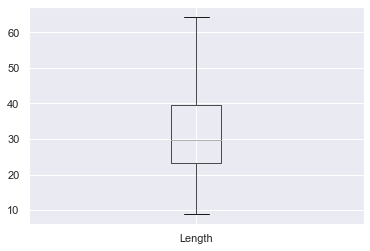

In [66]:
#taking column Length
lowerlength, upperlength = remove_outlier(bags_df["Length"])
bags_df["Length"] = np.where(bags_df["Length"]>upperlength,upperlength,bags_df["Length"])
bags_df["Length"] = np.where(bags_df["Length"]<lowerlength,lowerlength,bags_df["Length"])

bags_df.boxplot(column=["Length"])#visualising the column to see if it fixed the problem
plt.show()

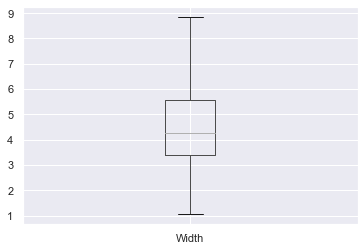

In [67]:
#taking column Width
lowerwidth, upperwidth = remove_outlier(bags_df["Width"])
bags_df["Width"] = np.where(bags_df["Width"]>upperwidth,upperwidth,bags_df["Width"])
bags_df["Width"] = np.where(bags_df["Width"]<lowerwidth,lowerwidth,bags_df["Width"])

bags_df.boxplot(column=["Width"])#visualising the column to see if it fixed the problem
plt.show()

Feature scaling

In [68]:
#checking the status of the dataset again
bags_df.describe()

,Cost,Weight_compact,Weight_expanded,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,395.401887,26.174371,28.342453,31.206918,8.925576,4.448331
std,348.555952,9.775683,10.499859,11.541012,4.260588,1.699199
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.584500
max,1445.000000,53.175000,57.250000,64.400000,18.957000,8.858850


In [69]:
#scaling data using sklearn. convert variables with different scales of measurements into a single scale. StandardScaler normalizes the data using the formula (x-mean)/standard deviation.
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale


StandardScaler()

In [70]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [71]:
bags_df["Cost"] = std_scale.fit_transform(bags_df[["Cost"]])
bags_df["Weight_compact"] = std_scale.fit_transform(bags_df[["Weight_compact"]])
bags_df["Weight_expanded"] = std_scale.fit_transform(bags_df[["Weight_expanded"]])
bags_df["Length"] = std_scale.fit_transform(bags_df[["Length"]])
bags_df["Height"] = std_scale.fit_transform(bags_df[["Height"]])
bags_df["Width"] = std_scale.fit_transform(bags_df[["Width"]])
bags_df.head()

,Cost,Weight_compact,Weight_expanded,Length,Height,Width
0,-0.441497,-0.305224,-0.281123,-0.104907,0.610860,-0.252875
1,-0.303351,-0.223129,-0.195137,-0.000601,0.836893,-0.084264
2,-0.159449,-0.233391,-0.176028,-0.009293,0.812829,0.146276
3,-0.093254,0.012892,0.062822,0.199318,0.895755,0.004232
4,0.099575,0.033415,0.062822,0.242778,0.828416,0.404800


<AxesSubplot:>

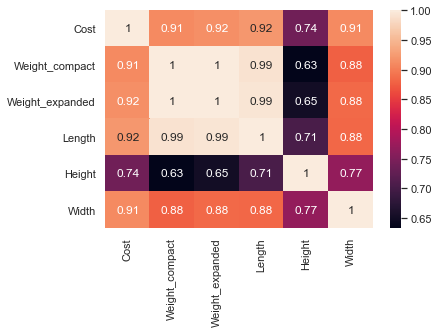

In [72]:
# heat map to understand correlations
sns.heatmap(bags_df.corr(),annot=True)

Starting with 